<a href="https://colab.research.google.com/github/SarahSnigdha/Course/blob/main/lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

import plotly.graph_objects as pg
import plotly.express as px

pd.Series<the results are stored in panda series>

pg.Figure<creates a figure>
pg.Bar<creates a bar graph with x=  the key{heads and tails} and y =values{results}>

In [4]:
def tossCoin(numberOfTosses=100):
  return pd.Series(np.random.choice(['Heads', 'Tails'], numberOfTosses))#picking from options

def throwDice(numberOfTosses=100):
  return pd.Series(np.random.randint(1,6+1, numberOfTosses))#picking from a range

results= tossCoin()
print(results.value_counts())
fig= pg.Figure([pg.Bar(x=results.value_counts().keys(), y= results.value_counts().values)])
fig.show()

Heads    55
Tails    45
Name: count, dtype: int64


In [5]:
#derived probability distributions
#given that the coin is tossed 20 times what is the prob that heads turns up
results= pd.Series([np.sum(tossCoin(20) =='Heads') for _ in range(1000)])
print(results)
fig=pg.Figure([pg.Bar(x=results.value_counts().keys(),y=results.value_counts().values)])
fig.show()

0       8
1      11
2      11
3       7
4       9
       ..
995    10
996    11
997     7
998    12
999     9
Length: 1000, dtype: int64


In [10]:
results = {shots: throwDice(shots) for shots in [10, 100, 1000, 10000, 1000000]}
 # Create the plot
fig = pg.Figure([ pg.Bar( x=result.value_counts().keys(), y=result.value_counts().values / shots ) for shots, result in results.items() ])
  # Add the expected probability line (1/6 for a fair dice)
fig.add_shape( type='line', x0=0.5, y0=1/6, x1=6.5, y1=1/6, line=dict(color='Red') )
  # Show the plot
fig.show()

In [17]:
# probability ditribution
def number_of_numbered_cards_drawn_before_ace(trials=100, show_trials=10):
    values = ['A', '2', '3', '4', '5', '6', '7', '8', '9', '10', 'J', 'Q', 'K']
    ranks = ['H', 'D', 'C', 'S']

    cards_thrown_counts = []
    for experiment in range(trials):
        deck_of_cards = [value + rank for value in values for rank in ranks]
        cards_thrown = 0
        cards_pile = []
        while len(deck_of_cards) > 0:
            picked_card = np.random.choice(deck_of_cards)
            cards_pile.append(picked_card)
            if picked_card[0] == 'A':
                break
            cards_thrown += 1
            deck_of_cards.remove(picked_card)
        if experiment < show_trials:
            print(cards_thrown, 'cards were thrown:', ' '.join(cards_pile))
        cards_thrown_counts.append(cards_thrown)

    return np.mean(cards_thrown_counts), cards_thrown_counts

expected_cards_thrown, cards_thrown_counts = number_of_numbered_cards_drawn_before_ace(10000)
print(f'\n{expected_cards_thrown} cards are tossed before we see the first ace!')

results = pd.Series(cards_thrown_counts)
fig = pg.Figure([pg.Bar(x=results.value_counts().keys(),
                        y=results.value_counts().values)])
fig.show()

12 cards were thrown: 7D 2C 4H QC KD 5D 10C 7C QS 6H 7S 2D AC
7 cards were thrown: 3H 8D 5D QC JD 4D 8H AD
7 cards were thrown: 8H 2S JC 6C 7D 9D 5D AC
30 cards were thrown: 5S KD 2H 10H 8S QD 3S JD 4S 3D 2S 4D QC 8D 9C KC JC 3C 8H 10D 6D 2C 5C 5H 9D 6S 9S KS JH 9H AS
4 cards were thrown: 7S 4H 8H 2S AS
0 cards were thrown: AD
4 cards were thrown: 9S 10S 6S 4S AS
7 cards were thrown: QC 10S 2D QD 4S 6S 8S AS
4 cards were thrown: 3D 6C QH 7S AH
8 cards were thrown: 9H 10H QC 2D KC 5H 2C 3S AS

9.5463 cards are tossed before we see the first ace!


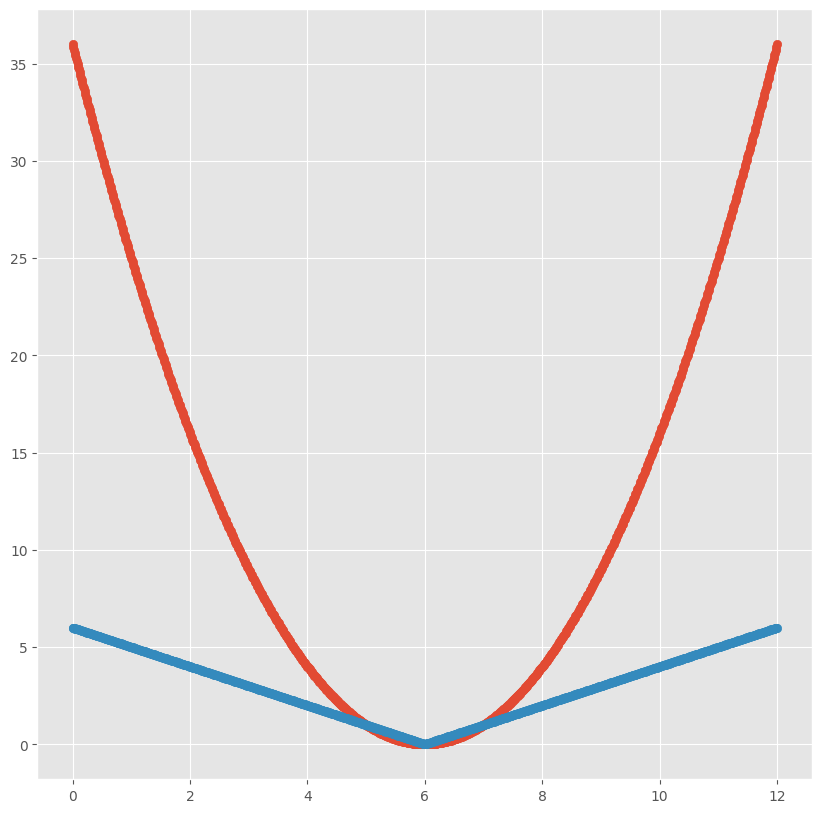

In [18]:
from matplotlib import pyplot as plt
plt.style.use('ggplot')
plt.figure(figsize=(10, 10))

measurements = np.linspace(0, 12, 1000)#creating 1000 values evenly spaced between 0 & 12
plt.scatter(measurements, (measurements - 6) ** 2, label='Squared Error')#formula
plt.scatter(measurements, abs(measurements - 6), label='Absolute Error')#formula
plt.show()

In [25]:
#normal distribution
from scipy.stats import norm
norm.cdf(0)
#since the curve is symmetric

0.5

In [26]:
norm.ppf(0.84, loc=169.57, scale=7.57)

177.09804617589782

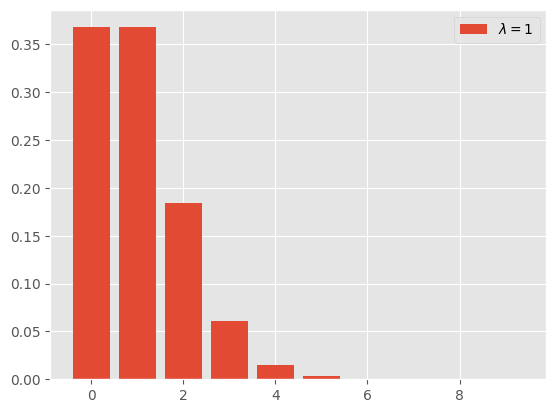

In [27]:
from scipy.stats import poisson

x = np.arange(10)
f1 = poisson.pmf(x, mu=1)
f2 = poisson.pmf(x, mu=2)
f3 = poisson.pmf(x, mu=3)

plt.bar(x, f1, label="$\lambda=1$")
plt.legend()

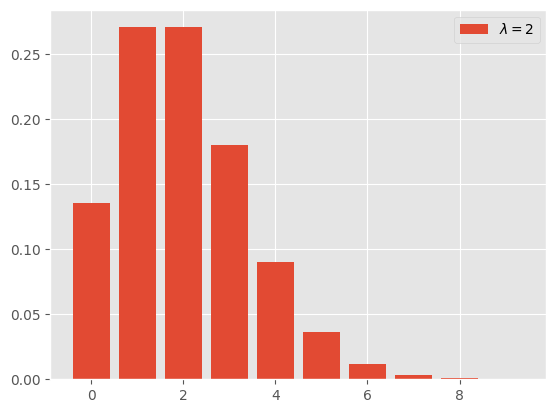

In [28]:
plt.bar(x, f2, label="$\lambda=2$")
plt.legend()

In [31]:
poisson.pmf(3,5)

0.1403738958142805

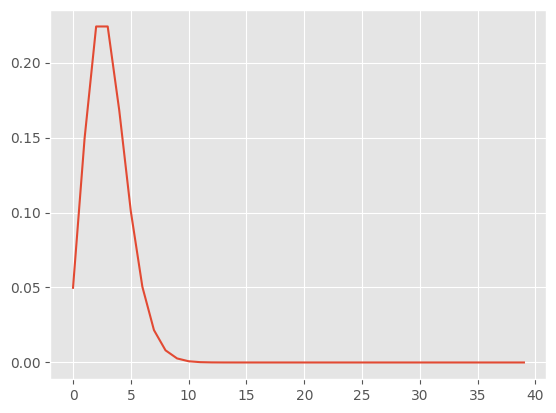

In [32]:
#central limit theorem
bins = np.arange(0, 40)
p_pois = poisson.pmf(bins, mu=3)
plt.plot(bins, p_pois)

(array([ 7., 23., 44., 83., 73., 95., 36., 25.,  7.,  7.]),
 array([2.  , 2.22, 2.44, 2.66, 2.88, 3.1 , 3.32, 3.54, 3.76, 3.98, 4.2 ]),
 <BarContainer object of 10 artists>)

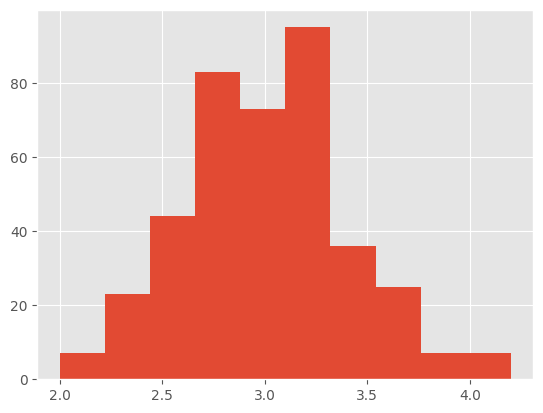

In [33]:
def sample_pois(_):
    samples = poisson.rvs(mu=3, size=20)
    return np.mean(samples)

means = list(map(sample_pois, np.arange(400)))
plt.hist(means)

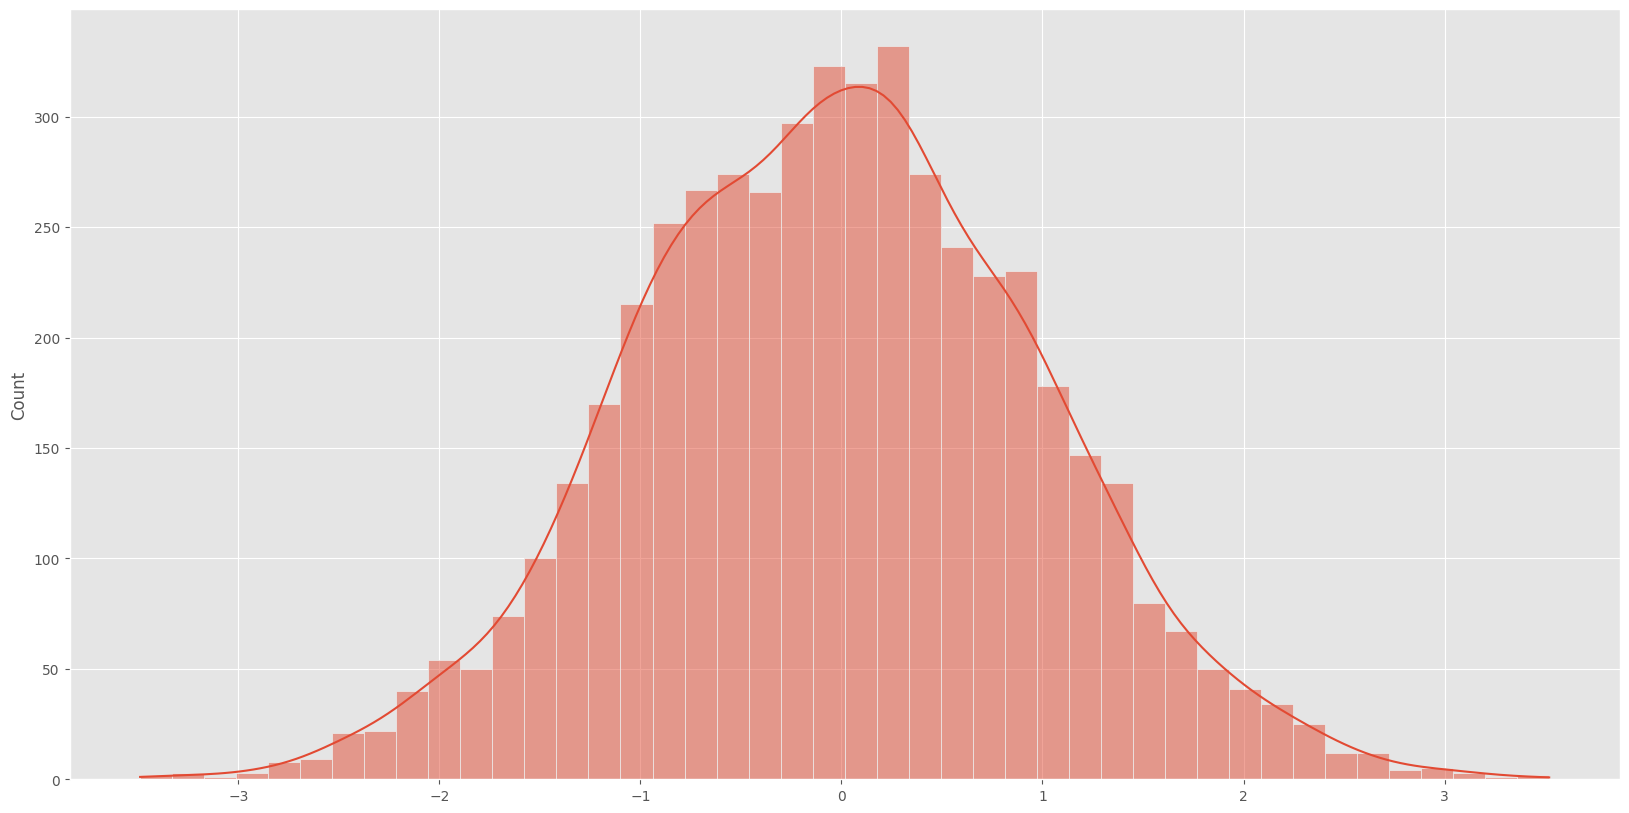

In [35]:
import seaborn as sns
plt.figure(figsize=(20, 10))
x = np.random.normal(size=(5000))
sns.histplot(x, kde=True)
plt.show()